# 'open-visualizations' for repeated measures in Python - #1

*Jordy van Langen*    
*jordy.vanlangen@sydney.edu.au*   
*19-03-2020* 

## Background

This tutorial is a follow up on my ['Open-visualizations tutorial for repeated measures in R'](https://github.com/jorvlan/open-visualizations/tree/master/R) and contributes to a GitHub repository called ['open-visualizations'](https://github.com/jorvlan/open-visualizations). 

Next to this notebook, I have also created another tutorial in Python with a slightly different approach which does not include R-like behavior. See ['open-visualizations'](https://github.com/jorvlan/open-visualizations) to view that tutorial. 


If you have any questions, or suggestions for improvement, please open an issue in the GitHub repository [open-visualizations](https://github.com/jorvlan/open-visualizations). 

If you use my repository for your research, please reference it.




## Load libraries

In [7]:
from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Note

- If `plotnine` is not included in your environment (e.g, Anaconda), you can read about how to install it here:  https://github.com/conda-forge/plotnine-feedstock

## Activate folder where figures are stored

- By default, figures will not be saved. If you want to save figures, set savefig to `True`.

In [8]:
savefig = True

if savefig:
    
    #Load libraries
    import os
    from os.path import isdir
    
    #Get current working directory, but you can specify your own directory of course.
    cwd = os.getcwd()
    
    if  os.path.exists(cwd + "/repmes_tutorial_1_python/figs"):
        print("Directory already exists")

        #Assign the existing directory to a variable
        fig_dir = cwd + "/repmes_tutorial_1_python/figs"
        
    elif not os.path.exists(cwd + "/figs"):
        print("Directory does not exist and will be created ......")
        os.makedirs(cwd + "/figs")
        
        if isdir(cwd + "/figs"):
            print('Directory was created succesfully')
        
        #Assign the created directory to a variable
        fig_dir = cwd + "/figs" 
   
    else:
        print("Something went wrong")

Something went wrong


## Load the data

- For this tutorial we make use of the `iris` dataset which we can access in two ways.
   

In [9]:
# Directly from URL

df = pd.read_csv('corr_table.csv')

# Locally

#path = "/Users/jordyvanlangen/Downloads/iris.csv"

#iris_df = pd.read_csv(path)
#iris_df
df['x'] = df['modality']
df['y'] = df['slope']
df['id'] = df['subject']
del df['subject']
del df['modality']
del df['slope']
df
df.loc[df['x']=='LE', 'x']= 1
df.loc[df['x']=='ED', 'x']= 2
df.loc[df['x']=='EE', 'x']= 3
df.loc[df['x']=='SP', 'x']= 4
df
# df
# x = df['x']
# y = df['y']
# df[df['x']=='ES']['x'] = 2
# df[df['x']=='EE']['x'] = 3
# df[df['x']=='SP']['x'] = 4

,x,y,id
0,1,1.180764e+00,1
1,1,1.003681e+00,2
2,1,7.822669e-01,3
3,1,4.450440e-01,4
4,1,1.009748e+00,5
...,...,...,...
279,4,1.834613e-16,67
280,4,9.250000e-01,68
281,4,-3.250000e-01,69
282,4,9.583333e-01,70


## Figure 1

In [10]:
# ------ Define pre-settings  ------ #
w = 10
h = 6
labels = np.array(['LE', 'ES', 'EE', 'SP'])
savefig = True
fig_dir = './figs'


### Note

- `verbose =` needs to be specified, because if `True` (default), `plotnine` will throw a warning. 
- See https://github.com/has2k1/plotnine/blob/83ceee3b08a8e12b286479b021e85b64fc8eb40d/plotnine/ggplot.py for more information.

## Figure 2

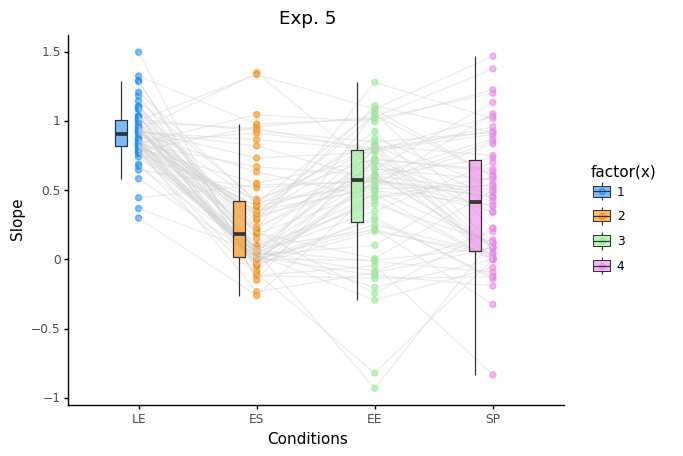

<ggplot: (8786120981685)>

In [11]:
# Plot figure 
#breaks = [1, 2]
d = df

fig2 = (
    ggplot(d) 
    + geom_point(aes(x='x', y = 'y', color='factor(x)'), alpha=.6, size=2) #fill = 'x') 
       + scale_color_manual(values = np.array(["dodgerblue",
                                "darkorange",
                               "lightgreen",'violet'])) 
                                   + geom_line(aes(x='x', y = 'y', group='id'), color = 'lightgray', alpha=.45)

    + geom_boxplot(d,aes(x='x', y = 'y', fill='factor(x)'), position = position_nudge(x=-.15),width = .1, alpha = .6, outlier_alpha=0, fatten=3)
    + scale_fill_manual(values = ["dodgerblue",
                                "darkorange",
                               "lightgreen",'violet']) 
    + theme_classic()
    + scale_x_discrete(labels = labels, name = 'Conditions')
    + ylab('Slope')
    + ggtitle('Exp. 5')
 
)

# Save figure
if savefig:
    fig2.save(fig_dir + "/figure2.png", width = w, height = h, verbose = False)
    
# Show figure
fig2

## Figure 3

First we have to create a new variable that contains jitter along the x-axis.

     x         y  id
71   2  0.066667   1
72   2  1.334183   2
73   2  0.052101   3
74   2  0.538073   4
75   2  0.929355   5
..  ..       ...  ..
208  3  0.470355  67
209  3  0.802595  68
210  3  0.219383  69
211  3  0.774477  70
212  3  0.785868  71

[142 rows x 3 columns]


/tmp/ipykernel_34353/2031313791.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/tmp/ipykernel_34353/2031313791.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


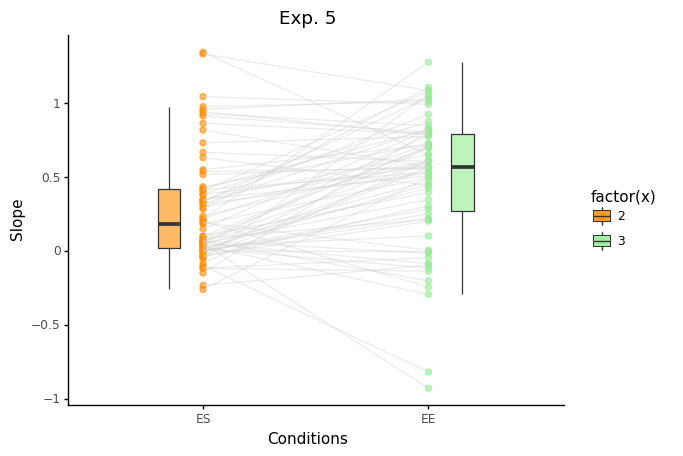

<ggplot: (8786116769844)>

In [13]:

# Plot figure 
#breaks = [1, 2]
modalities = np.array([2, 3])
colors = np.array(['dodgerblue', "darkorange", 'lightgreen', 'violet'])

d = df[df['x'].isin(modalities)]

print(d)

fig3 = (
    ggplot(d) 
    + geom_point(aes(x='x', y = 'y', color='factor(x)'), alpha=.6, size=2) #fill = 'x') 
    + scale_color_manual(values = colors[modalities-1])
    + geom_line(aes(x='x', y = 'y', group='id'), color = 'lightgray', alpha=.45)
    + geom_boxplot(d[df['x']==modalities[1]],aes(x='x', y = 'y', fill='factor(x)'), position = position_nudge(x=.15),width = .1, alpha = .6, outlier_alpha=0, fatten=3)

    + geom_boxplot(d[df['x']==modalities[0]],aes(x='x', y = 'y', fill='factor(x)'), position = position_nudge(x=-.15),width = .1, alpha = .6, outlier_alpha=0, fatten=3)

    + scale_fill_manual(values =colors[modalities-1]) 
    + theme_classic()
    + scale_x_discrete(labels = labels[modalities-1], name = 'Conditions')
    + ylab('Slope')
    + ggtitle('Exp. 5')
 
)

# Save figure
if savefig:
    fig3.save(fig_dir + "/figure3.png", width = w, height = h, verbose = False)
    
# Show figure
fig3



In [55]:
# Create two variables indicating jitter 
np.random.seed(321)
xj = np.random.normal(1, 0.05, len(d['x']))

np.random.seed(321)
xj_2 = np.random.normal(2, 0.05, len(d['x'].iloc[0:50]))



# Create two dataframes of those variables an put them together 
xj_df = pd.DataFrame(xj, columns = ['xj'])
xj_2_df = pd.DataFrame(xj_2, columns = ['xj'])

frames_jit = [xj_df, xj_2_df]

# Use the concat function to concatenate them 
jit_df = pd.concat((frames_jit), ignore_index = True)

In [57]:
# Merge the jitter dataframes with the other existing dataframes 

id_df = df['id']
d = pd.concat([y,x,id_df,jit_df], axis=1)

pd.options.display.float_format = '{:.3f}'.format
print("The manipulated dataframe with 4 columns including jitter ")
print(d[['y', 'x', 'id','xj']])

The manipulated dataframe with 4 columns including jitter 
         y  x  id    xj
0    1.181  1   1 1.009
1    1.004  1   2 1.082
2    0.782  1   3 1.002
3    0.445  1   4 0.956
4    1.010  1   5 0.943
..     ... ..  ..   ...
279  0.000  4  67   NaN
280  0.925  4  68   NaN
281 -0.325  4  69   NaN
282  0.958  4  70   NaN
283  1.033  4  71   NaN

[284 rows x 4 columns]


C:\Python37\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 184 rows containing missing values.
C:\Python37\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.


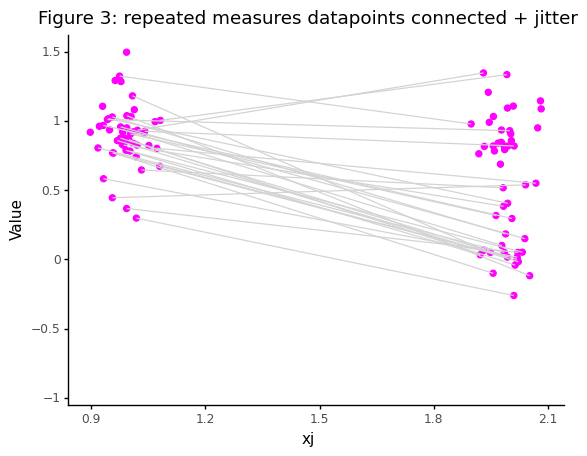

<ggplot: (167051650922)>

In [60]:
# Plot figure 
fig3 = (
    ggplot(d) 
    + geom_point(aes(x='xj', y = 'y'), color = 'magenta', size = 2) 
    + geom_line(aes(x='xj', y = 'y', group='id'), color = 'lightgray')
    + theme_classic()
    #+ scale_x_continuous(breaks=(1, 2), labels = labels, name = 'Conditions', limits = (0.5,2.5))
    + ylab('Value')
    + ggtitle('Figure 3: repeated measures datapoints connected + jitter')
)

# Save figure
#if savefig:
#    fig3.save(fig_dir + "/figure3.png", width = w, height = h, verbose = False)
    
# Show figure
fig3

## Figure 4

Let's color the variables according to their group: 'Before' and 'After.

**Note**:    
Alternatively, you could also use one `geom_point` and color the data within the `aes` call, instead of using an extra line of code of `geom_point`. The downside of that approach is that you're less flexible in e.g., controlling the color of your `geom` objects.

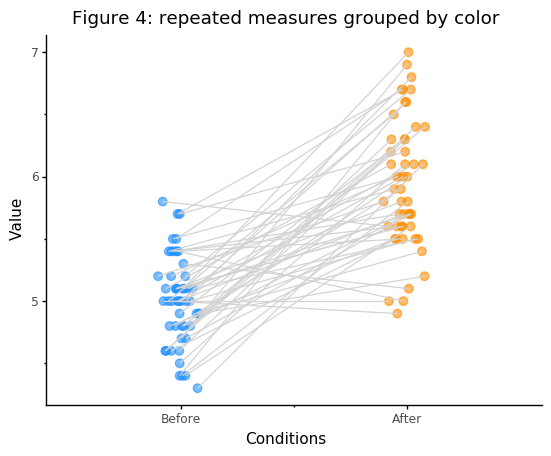

<ggplot: (7549795027)>

In [ ]:
# Plot figure 
fig4 = (
    ggplot(d)
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 3)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 3)
    + geom_line(aes(x='xj', y = 'y', group = 'id'), color = 'lightgray')
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2), labels = labels, name = 'Conditions', limits = (0.5,2.5))
    + ylab('Value')
    + ggtitle('Figure 4: repeated measures grouped by color')
)

# Save figure
if savefig:
    fig4.save(fig_dir + "/figure4.png", width = w, height = h, verbose = False)
    
# Show figure
fig4

## Figure 5

Let's try to see whether we can add boxplots.

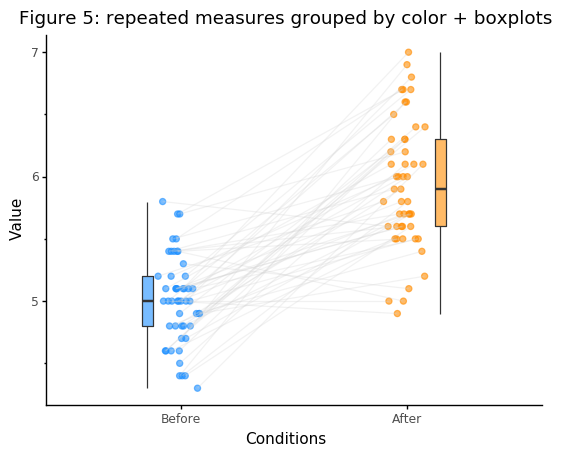

<ggplot: (-9223372029304737518)>

In [ ]:
# Plot figure 
fig5 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='xj', y = 'y', group = 'id'), color = 'lightgray', alpha = .3)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.15),width = .05, alpha = .6)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), fill = 'darkorange', show_legend=False, position = position_nudge(x=0.15),width = .05, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 5: repeated measures grouped by color + boxplots')
)

# Save figure
if savefig:
    fig5.save(fig_dir + "/figure5.png", width = w, height = h, verbose = False)
    
# Show figure
fig5

## Figure 6

Let's see whether we can add violins. Currently, `plotnine` does not support the R package `gghalves`, therefore it is - to the best of my knowledge - not possible to create the `half_violins` as done in R. I've opened an Issue on the GitHub page to see whether it is possible to add the `half_geoms` in the future release of `plotnine`. 

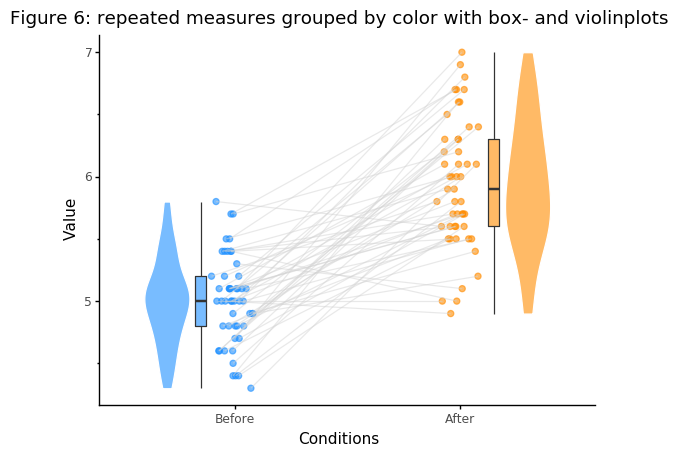

<ggplot: (-9223372029304995598)>

In [ ]:
# Plot figure 
fig6 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='xj', y = 'y', group = 'id'), color = 'lightgray', alpha = .5)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.15),width = .05, alpha = .6)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), fill = 'darkorange', show_legend=False, position = position_nudge(x=0.15),width = .05, alpha = .6)
    + geom_violin(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), color = 'white', fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.3), width = .2, alpha = .6)
    + geom_violin(d.iloc[50:100,:],aes(x='factor(x)', y = 'y'), color = 'white', fill = 'darkorange', show_legend=False, position = position_nudge(x=.3), width = .2, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 6: repeated measures grouped by color with box- and violinplots')

)

# Save figure
if savefig:
    fig6.save(fig_dir + "/figure6.png", width = w, height = h, verbose = False)
    
# Show figure
fig6

## Figure 7

Lets try to add means and ci's in the figure.

In [ ]:
# Load scipy.stats 
import scipy.stats as st

In [ ]:
# Calculate some basic statistics 
score_mean_1 = np.mean(d['y'].iloc[0:50])
score_mean_2 = np.mean(d['y'].iloc[50:100])

score_median_1 = np.median(d['y'].iloc[0:50])
score_median_2 = np.median(d['y'].iloc[50:100])

score_std_1 = np.std(d['y'].iloc[1:50])
score_std_2 = np.std(d['y'].iloc[50:100])

score_se_1 = score_std_1/np.sqrt(50) #adjust your n
score_se_2 = score_std_2/np.sqrt(50) #adjust your n

score_ci_1 = st.t.interval(0.95, len(d['y'].iloc[0:50])-1, loc=score_mean_1, scale=st.sem(d['y'].iloc[0:50]))
score_ci_2 = st.t.interval(0.95, len(d['y'].iloc[50:100])-1, loc=score_mean_2, scale=st.sem(d['y'].iloc[50:100]))


# Create dataframe with these variables 
summary_df = pd.DataFrame({'group': ["x", "z"],
                           'N': [50, 50],
                           'score_mean': [score_mean_1, score_mean_2],
                           'score_median': [score_median_1, score_median_2],
                           'score_std': [score_std_1, score_std_2],
                           'score_se': [score_se_1, score_se_2],
                           'score_ci': [score_ci_1[1]-score_ci_1[0], score_ci_2[1]-score_ci_2[0]]                          
                          })
summary_df

,group,N,score_mean,score_median,score_std,score_se,score_ci
0,x,50,5.006,5.000,0.352,0.050,0.200
1,z,50,5.936,5.900,0.511,0.072,0.293


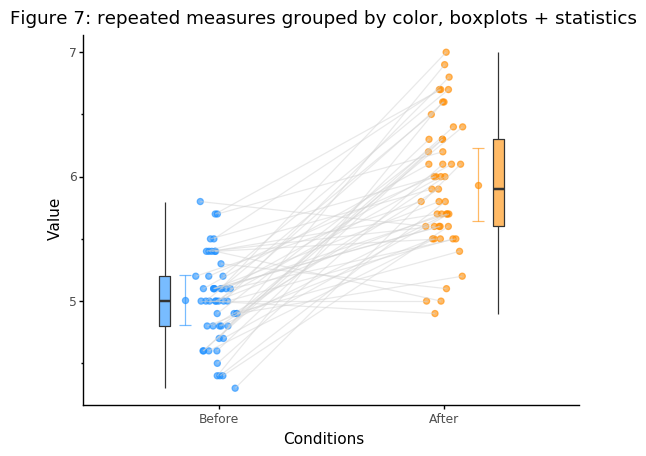

<ggplot: (7549755105)>

In [ ]:
# Plot figure 
fig7 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='xj', y = 'y', group = 'id'), color = 'lightgray', alpha = .5)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.24),width = .05, alpha = .6)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), fill = 'darkorange', show_legend=False, position = position_nudge(x=0.24),width = .05, alpha = .6)
    + geom_point(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2]), color = 'dodgerblue', show_legend = False, position = position_nudge(x = -.15), alpha = .6, size = 2)
    + geom_point(summary_df.iloc[1:2,:],aes(x = 2, y = summary_df.iloc[1,2]), color = 'darkorange', show_legend = False, position = position_nudge(x = .15), alpha = .6, size = 2)
    + geom_errorbar(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2], ymin = summary_df.iloc[0,2]-summary_df.iloc[0,6], 
                                              ymax = summary_df.iloc[0,2]+summary_df.iloc[0,6]), color = 'dodgerblue', show_legend = False, position = position_nudge(-.15), width = .05, alpha = .6)
    + geom_errorbar(summary_df.iloc[1:2,:], aes(x = 2, y = summary_df.iloc[1,2], ymin = summary_df.iloc[1,2]-summary_df.iloc[1,6],
                                            ymax = summary_df.iloc[1,2]+summary_df.iloc[1,6]), color = 'darkorange', show_legend = False, position = position_nudge(.15), width = .05, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 7: repeated measures grouped by color, boxplots + statistics')
)

# Save figure
if savefig:
    fig7.save(fig_dir + "/figure7.png", width = w, height = h, verbose = False)
    
# Show figure
fig7

## Figure 8

We can try to add a line connecting the means.

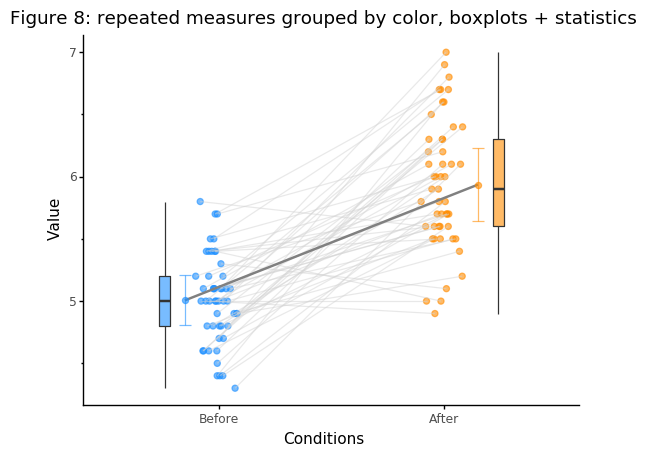

<ggplot: (-9223372029305769735)>

In [ ]:
# Define the x-axis location of both means, 
# which in this case is: 1 & 'position_nudge(-.15)' = .85 and 2 & position_nudge(.15) = 2.15
x_tick_means = [0.85,2.15]

# Plot figure 
fig8 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='xj', y = 'y', group = 'id'), color = 'lightgray', alpha = .5)
    + geom_line(summary_df,aes(x = x_tick_means, y = 'score_mean'), color = 'gray', size = 1)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.24),width = .05, alpha = .6)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), fill = 'darkorange', show_legend=False, position = position_nudge(x=0.24),width = .05, alpha = .6)
    + geom_point(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2]), color = 'dodgerblue', show_legend = False, position = position_nudge(x = -.15), alpha = .6, size = 2)
    + geom_point(summary_df.iloc[1:2,:],aes(x = 2, y = summary_df.iloc[1,2]), color = 'darkorange', show_legend = False, position = position_nudge(x = .15), alpha = .6, size = 2)
    + geom_errorbar(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2], ymin = summary_df.iloc[0,2]-summary_df.iloc[0,6], 
                                              ymax = summary_df.iloc[0,2]+summary_df.iloc[0,6]), color = 'dodgerblue', show_legend = False, position = position_nudge(-.15), width = .05, alpha = .6)
    + geom_errorbar(summary_df.iloc[1:2,:], aes(x = 2, y = summary_df.iloc[1,2], ymin = summary_df.iloc[1,2]-summary_df.iloc[1,6],
                                            ymax = summary_df.iloc[1,2]+summary_df.iloc[1,6]), color = 'darkorange', show_legend = False, position = position_nudge(.15), width = .05, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 8: repeated measures grouped by color, boxplots + statistics')
)

# Save figure
if savefig:
    fig8.save(fig_dir + "/figure8.png", width = w, height = h, verbose = False)
    
# Show figure
fig8

## Figure 9

- Lets's try to add it all together.  
- I have been playing around with colors and styles.


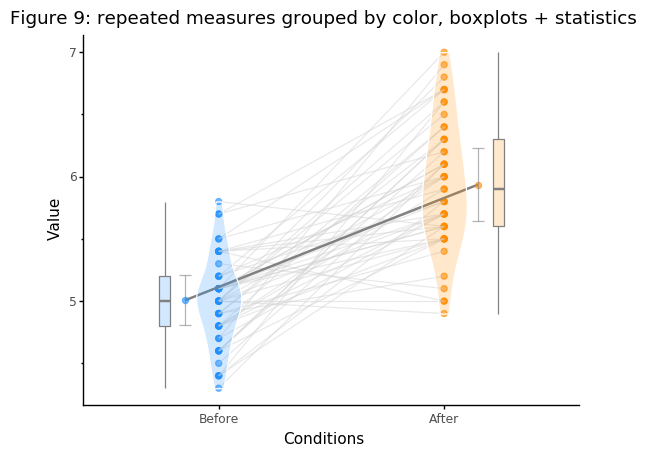

<ggplot: (-9223372029305168447)>

In [ ]:
# Plot figure 
fig9 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='x', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='x', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='x', y = 'y', group = 'id'), color = 'lightgray', alpha = .5)
    + geom_line(summary_df,aes(x = x_tick_means, y = 'score_mean'), color = 'gray', size = 1)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), color = 'gray', fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.24),width = .05, alpha = .2)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), color = 'gray', fill = 'darkorange', show_legend=False, position = position_nudge(x=0.24),width = .05, alpha = .2)
    + geom_violin(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), color = 'white', fill = 'dodgerblue', show_legend=False, position = position_nudge(x=0), width = .2, alpha = .2)
    + geom_violin(d.iloc[50:100,:],aes(x='factor(x)', y = 'y'), color = 'white', fill = 'darkorange', show_legend=False, position = position_nudge(x=0), width = .2, alpha = .2)
    + geom_point(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2]), color = 'dodgerblue', show_legend = False, position = position_nudge(x = -.15), alpha = .6, size = 2)
    + geom_point(summary_df.iloc[1:2,:],aes(x = 2, y = summary_df.iloc[1,2]), color = 'darkorange', show_legend = False, position = position_nudge(x = .15), alpha = .6, size = 2)
    + geom_errorbar(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2], ymin = summary_df.iloc[0,2]-summary_df.iloc[0,6], 
                                              ymax = summary_df.iloc[0,2]+summary_df.iloc[0,6]), color = 'gray', show_legend = False, position = position_nudge(-.15), width = .05, alpha = .6)
    + geom_errorbar(summary_df.iloc[1:2,:], aes(x = 2, y = summary_df.iloc[1,2], ymin = summary_df.iloc[1,2]-summary_df.iloc[1,6],
                                            ymax = summary_df.iloc[1,2]+summary_df.iloc[1,6]), color = 'gray', show_legend = False, position = position_nudge(.15), width = .05, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 9: repeated measures grouped by color, boxplots + statistics')
)

# Save figure
if savefig:
    fig9.save(fig_dir + "/figure9.png", width = w, height = h, verbose = False)
    
# Show figure
fig9

## General remarks / tips

- If you want to save your figures in a high-quality manner for e.g., publications, you could save your figure with a `.tif` extension and add `dpi=` as used in the following line of code:

- To save with `plotnine`: 

    `fig.save("/figure.tif", width = w, height = h, verbose = False, dpi = 600)`


- To save with `matplotlib`:

    `plt.savefig("/figure.tif", width = w, height = h, dpi = 600)`


## That's it! (for now)

You have reached the end of this document.

I hope you'll be able to use this tutorial to create more `open-visualizations` for your research!

If you use this tutorial, please cite it in your work (see DOI above).


[open-visualizations](https://github.com/jorvlan/open-visualizations) for repeated measures in `R` and `Python` by [**Jordy van Langen**](https://jordyvanlangen.com)

